# Topics: 
    
1. Calculating boolean statistics
2. Constructing multiple boolean conditions
3. Filtering with boolean indexing
4. Replicating boolean indexing with index selection
5. Selecting with unique and sorted indexes
6. Gaining perspective on stock prices
7. Translating SQL WHERE clauses
8. Determining the normality of stock market returns
9. Improving readability of boolean indexing with the query method
10. Preserving Series with the where method
11. Masking DataFrame rows
12. Selecting with booleans, integer location, and labels

### 1. Calculating boolean statistics

In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [150]:
df_movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [151]:
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [152]:
df_movie_above_120_min = df_movie['duration'] > 120

In [153]:
df_movie_above_120_min.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [154]:
df_movie_above_120_min.sum()

1039

In [155]:
df_movie_above_120_min.mean()

0.2113506916192026

In [156]:
df_movie['duration'].isna().sum()

15

In [157]:
# Drop the Falses and then take mean
df_movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [158]:
df_movie_above_120_min.describe()
# the data is cateforical, or boolean precisely, so min, mean and quantile values are not returned

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [159]:
df_movie_above_120_min.isna().sum()

0

In [160]:
df_movie_above_120_min.value_counts()

False    3877
True     1039
Name: duration, dtype: int64

In [161]:
df_movie_above_120_min.value_counts(normalize = True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [162]:
df_movie_above_120_min = df_movie_above_120_min.dropna()
df_movie_above_120_min.value_counts(normalize = True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [163]:
df_movie_actors = df_movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()

In [164]:
df_movie_actors.head()

,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
Avatar,1000.0,936.0
Pirates of the Caribbean: At World's End,40000.0,5000.0
Spectre,11000.0,393.0
The Dark Knight Rises,27000.0,23000.0
Star Wars: Episode VII - The Force Awakens,131.0,12.0


In [165]:
df_movie_actors['actor_1_facebook_likes'] > df_movie_actors['actor_2_facebook_likes']

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     True
                                              ...  
Signed Sealed Delivered                        True
The Following                                  True
A Plague So Pleasant                          False
Shanghai Calling                               True
My Date with Drew                              True
Length: 4903, dtype: bool

In [166]:
(df_movie_actors['actor_1_facebook_likes'] > df_movie_actors['actor_2_facebook_likes']).mean()

0.9777687130328371

### 2. Constructing multiple boolean conditions

In [167]:
df_movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [168]:
criteria1 = df_movie.imdb_score > 8
criteria2 = df_movie.content_rating == 'PG-13'
criteria3 = ((df_movie.title_year < 2000) | (df_movie.title_year > 2009))

In [169]:
criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [170]:
criteria_all = criteria1 & criteria2 & criteria3

In [171]:
criteria_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [172]:
#criteria_all = criteria1 and  criteria2 and  criteria3
# ValueError: The truth value of a Series is ambiguous. 
# Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 3. Filtering with boolean indexing

In [173]:
crit_a1 = df_movie.imdb_score > 8
crit_a2 = df_movie.content_rating == 'PG-13'
crit_a3 = (df_movie.title_year < 2000) | (df_movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [174]:
crit_b1 = df_movie.imdb_score < 5
crit_b2 = df_movie.content_rating == 'R'
crit_b3 = ((df_movie.title_year >= 2000) & (df_movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [175]:
final_crit_all = final_crit_a | final_crit_b

In [176]:
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [177]:
df_movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [178]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = df_movie.loc[final_crit_all, cols]

In [179]:
movie_filtered.head()

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0


### 4. Replicating boolean indexing with index selection

In [180]:
#Boolean Indexing
df_college = pd.read_csv('data/college.csv')
df_college[df_college['STABBR'] == 'TX'].head()


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [181]:
#Index Selection    
df_college_2 = df_college.set_index('STABBR')
df_college_2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [182]:
%timeit df_college[df_college['STABBR'] == 'TX'].head() #Boolean Indexing

825 µs ± 7.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [183]:
%timeit  df_college_2 = df_college.set_index('STABBR') #Index Selection

934 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [184]:
%timeit  df_college_2.loc['TX'].head()  #Index Selection

472 µs ± 4.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [185]:
# Index Selection is faster than Boolean Indexing, why?

In [186]:
states = ['TX', 'CA', 'NY']
df_college_3_states = df_college['STABBR'].isin(states)

In [187]:
df_college_2.loc[states]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,Briarcliffe College–Patchogue,Patchogue,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,38200,28720.5
NY,Jamestown Business College -,Salamanca,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12050
NY,Pratt Manhattan-A Division of Pratt Institute,New York,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,40900,26691


### 5. Selecting with unique and sorted indexes

In [188]:
df_college_2 = df_college.set_index('STABBR')

In [189]:
df_college_2.index.is_monotonic

False

In [190]:
df_college_3 = df_college_2.sort_index()

In [191]:
df_college_3.index.is_monotonic

True

In [192]:
 %timeit df_college[df_college['STABBR'] == 'TX']

693 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [193]:
 %timeit df_college_2.loc['TX']

364 µs ± 3.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [194]:
%timeit df_college_3.loc['TX']
# The time decreased as the index is sorted

124 µs ± 655 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [195]:
# Thanks to Binary Search when the Index is sorted, the fetch is faster

In [196]:
df_college.index = df_college['CITY'] + ', ' + df_college['STABBR']

In [197]:
df_college = df_college.sort_index()

In [198]:
df_college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [199]:
df_college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [200]:
%timeit df_college.loc['Miami, FL']

128 µs ± 7.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [201]:
%%timeit
crit1 = df_college['CITY'] == 'Miami'
crit2 = df_college['STABBR'] == 'FL'
df_college[crit1 & crit2]

1.17 ms ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [202]:
# Boolean Indexing offers more flexibility and speed when multiple columsn are
# used as an index

### 6. Gaining perspective on stock prices

In [203]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])

In [204]:
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [205]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])

In [206]:
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [207]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

In [208]:
slb_top_bottom_10

Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
              ...  
2016-01-15    63.01
2016-01-19    62.82
2016-01-20    61.06
2016-01-21    61.45
2016-01-25    63.30
Name: Close, Length: 380, dtype: float64

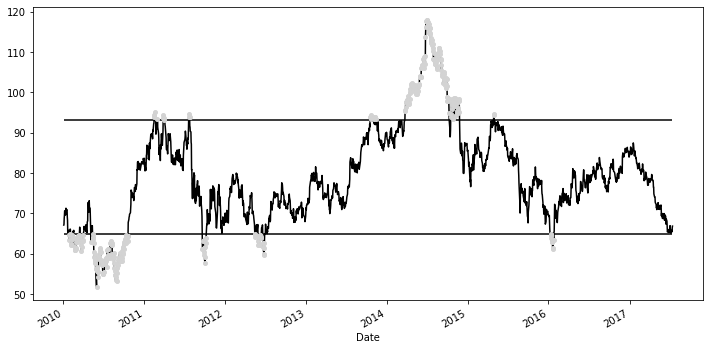

In [211]:
slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin,xmax=xmax, color='black')

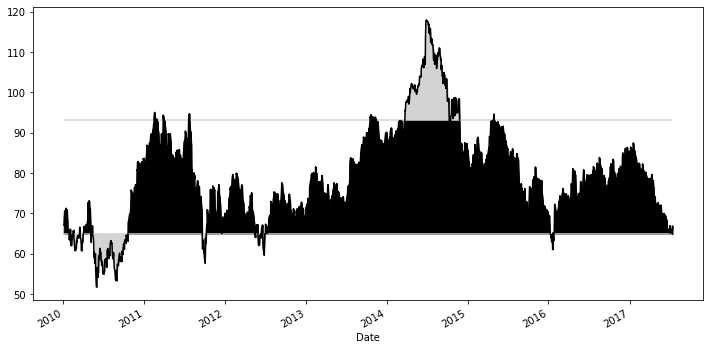

In [215]:
slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10, 
        y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index, y1=lower_10, 
        y2=slb_close.values, where=slb_close < lower_10,color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10, 
        y2=slb_close.values, where=slb_close > upper_10, color='lightgray')

### 7. Translating SQL WHERE clauses

In [217]:
employee = pd.read_csv('data/employee.csv')
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [218]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [219]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [221]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [225]:
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [226]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


### 8. Determining the normality of stock market returns

In [228]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])

In [229]:
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [236]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()
#alert me when the gold price changes, interview question

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

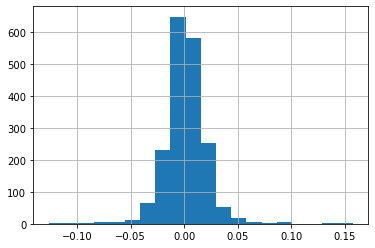

In [238]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [239]:
this_mean = amzn_daily_return.mean()
this_std = amzn_daily_return.std()

In [241]:
abs_z_score = amzn_daily_return.sub(this_mean).abs().div(this_std)

In [245]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. ''{:.3f} within 2 and {:.3f} within 3'.format(*pcts))
pcts

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]

In [246]:
# The percentages deviate greatly from the
# rule for 1 and 3 standard deviations, and we can conclude that Amazon daily stock returns
# do not follow a normal distribution

In [250]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    print('{:.3f} fall within 1 standard deviation. '
    '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

In [251]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


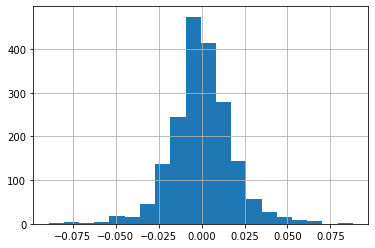

In [252]:
test_return_normality(slb)

In [254]:
# We can do for other stocks

### 9. Improving readability of boolean indexing with the query method

In [255]:
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT','GENDER', 'BASE_SALARY']

In [256]:
qs = "DEPARTMENT in @depts " \
 "and GENDER == 'Female' " \
 "and 80000 <= BASE_SALARY <= 120000"
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [258]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


### 10. Preserving Series with the where method

In [259]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [261]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

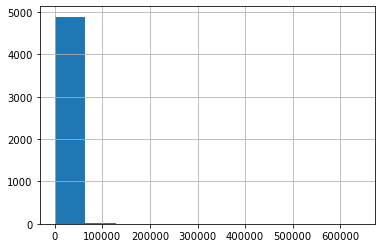

In [262]:
fb_likes.hist()

In [263]:
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [267]:
fb_likes_where = fb_likes.where(criteria_high)

In [270]:
fb_likes_where.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [268]:
fb_likes_where.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count     4460
mean      3846
std       5440
min          0
10%        210
25%        572
50%        931
75%       5000
90%      13000
max      19000
Name: actor_1_facebook_likes, dtype: int32

In [271]:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [272]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000).where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [273]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

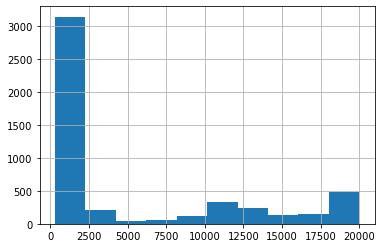

In [274]:
fb_likes_cap.hist()

In [278]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

### 11. Masking DataFrame rows

In [279]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [289]:
movie_mask_1 = movie.mask(criteria)

In [290]:
len(movie_mask_1)

4916

In [284]:
movie.where(criteria).head() #masking is opposite of where

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pirates of the Caribbean: At World's End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [285]:
movie_mask = movie.mask(criteria).dropna(how='all')

In [291]:
len(movie_mask)

3364

In [292]:
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [293]:
movie_boolean = movie[movie['title_year'] < 2010]

In [294]:
movie_mask.equals(movie_boolean)

False

In [295]:
movie_mask.shape == movie_boolean.shape


True

In [296]:
movie_mask.shape == movie_boolean.shape


True

In [297]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype=False)

In [298]:
%timeit movie.mask(criteria).dropna(how='all')

7.53 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [299]:
%timeit movie[movie['title_year'] < 2010]

688 µs ± 7.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [300]:
# Boolean Indexing is Faster compared to Masking

### 12. Selecting with booleans, integer location, and labels

In [301]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [302]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [303]:
movie_loc.equals(movie[criteria])

True

In [306]:
criteria.values

array([False, False, False, ..., False, False, False])

In [309]:
movie_iloc = movie.iloc[criteria.values] 
# .iloc takes integers not booleans? or am I wrong? why?

In [308]:
movie_iloc

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


In [310]:
criteria_col = movie.dtypes == np.int64

In [311]:
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [312]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [314]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [315]:
criteria

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

In [317]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [319]:
col_index = [movie.columns.get_loc(col) for col in cols]

movie.iloc[criteria.values, col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


In [326]:
movie.loc[[True, False, True], [True, False, False, True]] #worked? why?

IndexError: Boolean index has wrong length: 3 instead of 4916